<a href="https://colab.research.google.com/github/evelinafischer/AH2179/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Assignment 2**

####**Loading and Preparing the Dataset**

In [ ]:
# Code from the tutorial

# Import the pandas library, used for data manipulation and analysis
import pandas as pd
# Import the os, operating system, library
import os

# The URL where the dataset is stored
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


In [ ]:
# Code from the tutorial

# Group the dataset by the 'Sentiment' column and generate descriptive statistics
# count, mean, std, min, max, etc. for each sentiment class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [ ]:
# Code from the tutorial

# Remove any duplicate rows from the dataset
df = df.drop_duplicates()

# Group the dataset by the 'Sentiment' column and generate descriptive statistics
# count, mean, std, min, max, etc. for each sentiment class
df.groupby('Sentiment').describe()

Text                                          
          count unique                           top freq
Sentiment                                                
0          1008   1008           I8 is clear at 8 am    1
1          1079   1079  Express highway have traffic    1

In [ ]:
# Code from the tutorial

# Select the 'Text' column as input features
x = df['Text']

# Select the 'Sentiment' column as the target labels
y = df['Sentiment']

####**Finding the Best Text Classification Model and Vectorization for Sentiment Analysis**

In [ ]:
# Code from the tutorial

# Import pandas for data manipulation and analysis
import pandas as pd

# Import different vectorizers for converting text into numerical features
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Import train/test split function
from sklearn.model_selection import train_test_split

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import function to display a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd

# Import k-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Import Extreme Gradient Boosting classifie
from xgboost import XGBClassifier

# Import Support Vector Machine classifier
from sklearn.svm import SVC

# Import Bernoulli Naïve Bayes classifier
from sklearn.naive_bayes import BernoulliNB

# Import operating system library
import os

# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import accuracy_score metric to evaluate models
from sklearn.metrics import accuracy_score

In [ ]:
# Code from the tutorial

# -*-*-*-*-*-*- Choose Different Vectorization Methods -*-*-*-*-*-*-

# 1. CountVectorizer
# Converts text into a bag-of-words representation, counting word frequencies.
# Can include single words and pairs of words.
#vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

# 2. HashingVectorizer
# Uses a hashing trick to map text to feature indices without storing the vocabulary.
# Good for large datasets but cannot be inverted.
#vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

# 3. TfidfVectorizer
# Converts text into TF-IDF representation, Term Frequency – Inverse Document Frequency,
# which downweights common words and emphasizes rare but important ones.
vectorizer = TfidfVectorizer(
   min_df=20,
   norm='l2',
   smooth_idf=True,
   use_idf=True,
   ngram_range=(1, 1),
   stop_words='english'
   )

In [ ]:
# Code from the tutorial

# -*-*-*-*-*-*- Choose Different Models for Classification -*-*-*-*-*-*-

# Split the dataset into input features, x, and target labels y
x = df['Text'] # The text data that will be used for classification
y = df['Sentiment'] # The corresponding sentiment labels

# Split the data into training and testing sets
# 80% training, 20% testing, with a fixed random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Apply the chosen vectorizer to convert text into numerical features
x_train_vectorized = vectorizer.fit_transform(x_train) # Fit on training data and transform
x_test_vectorized = vectorizer.transform(x_test) # Transform test data

# 1. Logistic Regression
# model = LogisticRegression(max_iter=1000, random_state=0)
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 2. K-Nearest Neighbors
# model = KNeighborsClassifier()
# param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# 3. Random Forest
# model = RandomForestClassifier(random_state=0)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# 4. XGBoost
# model = XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5]
# }

# 5. Support Vector Machine
# model = SVC(probability=True)
# param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}

# 6. Naïve Bayes models
model=BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

{'alpha': 1, 'force_alpha': True}
The accuracy of the model is: 0.9401913875598086


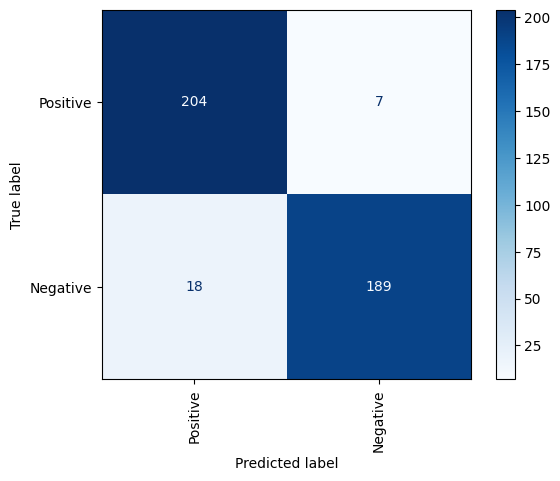

In [ ]:
# Code from the tutorial

# Perform a grid search with 5-fold cross-validation to find the best hyperparameters
# GridSearchCV systematically evaluates all combinations in param_grid and selects the one with the best accuracy
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search object on the training data
# This trains multiple models with different hyperparameter combinations
grid_search.fit(x_train_vectorized, y_train)

# Extract the best hyperparameters found by the grid search
best_params = grid_search.best_params_
print(best_params) # Display the best combination of hyperparameters

# Extract the best accuracy score from the cross-validation
best_score = grid_search.best_score_

# Update the model with the best estimator found during grid search
# This model is now trained with the optimal hyperparameters
model = grid_search.best_estimator_

# Train the selected model on the full training data
model.fit(x_train_vectorized, y_train)

# Display the confusion matrix for the test set predictions
# Confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives
cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'], # Labels for the confusion matrix
    cmap='Blues', # Color map for visualization
    xticks_rotation='vertical' # Rotate x-axis labels for readability
    )

# Calculate and print the accuracy of the model on the test data
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

####**Results**

**CountVectorizer Results:**

1. **Logistic Regression**
    
    Best Parameters: {'C': 1}
    
    Accuracy: 0.937799043062201

2. **K-Nearest Neighbors**

    Best Parameters:{'n_neighbors': 5, 'weights': 'uniform'}

    Accuracy: 0.9258373205741627

3. **Random Forest**

    Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

    Accuracy: 0.9641148325358851

4. **XGBoost**

    Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}

    Accuracy: 0.9593301435406698

5. **Support Vector Machine**  
    
    Best Parameters: {'C': 10, 'kernel': 'rbf'}

    Accuracy: 0.9569377990430622

6. **Naïve Bayes models**

    Best Parameters:{'alpha': 1, 'force_alpha': True}

    Accuracy: 0.9425837320574163


**HashingVectorizer Results:**

1. **Logistic Regression**

    Best Parameters:{'C': 10}

    Accuracy: 0.9497607655502392

2. **K-Nearest Neighbors**
    
    Best Parameters:{'n_neighbors': 9, 'weights': 'uniform'}

    Accuracy: 0.9521531100478469

3. **Random Forest**  
    
    Best Paramters{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

    Accuracy: 0.9712918660287081

4. **XGBoost**
    
    Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

    Accuracy: 0.9712918660287081

5. **Support Vector Machine**
    
    Best Parameters: {'C': 10, 'kernel': 'rbf'}

    Accuracy: 0.9712918660287081

6. **Naïve Bayes models**
    
    Best Parameters: {'alpha': 1, 'force_alpha': True}

    Accuracy: 0.8349282296650717

**TfidVectorizer Results:**

1. **Logistic Regression**
    
    Best Parameters: {'C': 0.1}

    Accuracy: 0.9545454545454546

2. **K-Nearest Neighbors**
    
    Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}

    Accuracy: 0.9090909090909091

3. **Random Forest**

    Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

    Accuracy: 0.9712918660287081

4. **XGBoost**
    
    Best Parameters:{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

    Accuracy: 0.9641148325358851

5. **Support Vector Machine**
    
    Best Parameters:{'C': 0.1, 'kernel': 'rbf'}
  
    Accuracy: 0.9593301435406698

6. **Naïve Bayes models**
    
    Best Paramters: {'alpha': 1, 'force_alpha': True}
    
    Accuracy: 0.9401913875598086